1.Загрузить необходимые данные к себе и считать (read) их в переменную.

In [23]:
import pandas as pd
   
file_path = 'C:/Users/Влад/Downloads/NY-House-Dataset.csv'
data = pd.read_csv(file_path)

2.Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.

можно сделать вывод, что у нас задача регрессии.
Это определяется следующими факторами:
Целевая переменная: В данном случае целевой переменной является "PRICE" (цена недвижимости).
Тип данных целевой переменной: "PRICE" представлена числовыми значениями (int64 или float64).
Количество уникальных значений: В столбце "PRICE" наблюдается большое количество уникальных значений, что характерно для непрерывных данных.
Диапазон значений: Цены варьируются от 69,000 до 195,000,000, что указывает на широкий и непрерывный диапазон значений.
Природа задачи: Прогнозирование цены недвижимости обычно является задачей регрессии, так как цель состоит в предсказании конкретного числового значения, а не отнесении к определенному классу.
Таким образом, учитывая характер целевой переменной и специфику задачи, мы имеем дело с задачей регрессии, где целью является предсказание непрерывной величины - цены недвижимости.

3.Сделать предобработку данных:

A.Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.

In [24]:
from sklearn.model_selection import train_test_split


# Split into train and test datasets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the resulting dataframes for inspection
train_data_head = train_data.head()
test_data_head = test_data.head()
train_data.shape, test_data.shape, train_data_head, test_data_head


((3840, 17),
 (961, 17),
                                    BROKERTITLE            TYPE    PRICE  BEDS  \
 2851  Brokered by Signature Premier Properties  Co-op for sale   255000     1   
 3262          Brokered by Brown Harris Stevens  Co-op for sale   160000     1   
 4577                   Brokered by Papa Realty  Co-op for sale   498000     2   
 1774                    Brokered by EXP Realty         Pending   555000     3   
 1957         Brokered by Trademarko Realty Inc  House for sale  1475000     5   
 
       BATH  PROPERTYSQFT                     ADDRESS                  STATE  \
 2851   1.0   2184.207862  245-18 62nd Ave Unit Upper  Little Neck, NY 11362   
 3262   1.0   2184.207862   5601 Riverdale Ave Apt 3S        Bronx, NY 10471   
 4577   2.0   2184.207862        17-85 215 St Unit 6H      Bayside, NY 11360   
 1774   1.0   1504.000000           80-07 Margaret Pl     Glendale, NY 11385   
 1957   3.0   2637.000000               53-30 61st St      Maspeth, NY 11378   
 

Датасет был разделен на тренировочную (train) и тестовую (test) выборки с использованием функции train_test_split из библиотеки scikit-learn. Размер тестовой выборки составил 20% от общего объема данных:
Тренировочная выборка: 3840 записей
Тестовая выборка: 961 запись

B.Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3.

In [25]:
# Проверяем наличие пропусков
missing_values = train_data.isnull().sum()

# Заполняем пропуски средним значением для числовых столбцов и модой для категориальных
for column in train_data.columns:
    if train_data[column].dtype in ['float64', 'int64']:
        # Заполнение средним значением
        train_data[column] = train_data[column].fillna(train_data[column].mean())
        test_data[column] = test_data[column].fillna(train_data[column].mean())
    else:
        # Заполнение модой
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
        test_data[column] = test_data[column].fillna(train_data[column].mode()[0])

# Проверяем наличие пропусков после заполнения
missing_values_after = train_data.isnull().sum()
test_missing_values_after = test_data.isnull().sum()

missing_values, missing_values_after, test_missing_values_after


(BROKERTITLE                    0
 TYPE                           0
 PRICE                          0
 BEDS                           0
 BATH                           0
 PROPERTYSQFT                   0
 ADDRESS                        0
 STATE                          0
 MAIN_ADDRESS                   0
 ADMINISTRATIVE_AREA_LEVEL_2    0
 LOCALITY                       0
 SUBLOCALITY                    0
 STREET_NAME                    0
 LONG_NAME                      0
 FORMATTED_ADDRESS              0
 LATITUDE                       0
 LONGITUDE                      0
 dtype: int64,
 BROKERTITLE                    0
 TYPE                           0
 PRICE                          0
 BEDS                           0
 BATH                           0
 PROPERTYSQFT                   0
 ADDRESS                        0
 STATE                          0
 MAIN_ADDRESS                   0
 ADMINISTRATIVE_AREA_LEVEL_2    0
 LOCALITY                       0
 SUBLOCALITY                    0

Была проведена проверка на наличие пропущенных значений в данных. Результаты показали, что в исходном датасете пропусков не было. Тем не менее, была реализована стратегия заполнения пропусков:
Для числовых переменных: заполнение средним значением
Для категориальных переменных: заполнение модой (наиболее часто встречающимся значением)
После применения этой стратегии было подтверждено, что в обеих выборках (train и test) не осталось пропущенных значений.

C.Отнормировать численные переменные (StandardScaler, MinMaxScaler).

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Select numerical columns
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

# Apply scalers to numerical data in train set
train_standard_scaled = standard_scaler.fit_transform(train_data[numerical_cols])
train_minmax_scaled = minmax_scaler.fit_transform(train_data[numerical_cols])

# Apply scalers to numerical data in test set
test_standard_scaled = standard_scaler.transform(test_data[numerical_cols])
test_minmax_scaled = minmax_scaler.transform(test_data[numerical_cols])

# Convert back to DataFrame for inspection
scaled_train_standard = pd.DataFrame(train_standard_scaled, columns=numerical_cols).head()
scaled_train_minmax = pd.DataFrame(train_minmax_scaled, columns=numerical_cols).head()
scaled_train_standard, scaled_train_minmax


(      PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
 0 -0.063064 -0.905409 -0.690880     -0.001817  0.473555   2.089056
 1 -0.065781 -0.905409 -0.690880     -0.001817  2.180879   0.364929
 2 -0.056114 -0.520683 -0.191716     -0.001817  0.802158   1.646423
 3 -0.054484 -0.135957 -0.690880     -0.277629 -0.094723   0.847189
 4 -0.028172  0.633496  0.307447      0.181782  0.171254   0.373310,
       PRICE      BEDS  BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
 0  0.000118  0.000000  0.02      0.029687  0.619618   0.946932
 1  0.000073  0.000000  0.02      0.029687  0.981008   0.631915
 2  0.000231  0.020408  0.04      0.029687  0.689174   0.866058
 3  0.000257  0.040816  0.02      0.019268  0.499330   0.720029
 4  0.000686  0.081633  0.06      0.036622  0.555630   0.633446)

Для нормализации числовых переменных были использованы два метода:
StandardScaler: нормализация с приведением к нулевому среднему и единичной дисперсии
MinMaxScaler: масштабирование значений в диапазон [0, 1]
Нормализация была применена к следующим числовым признакам: 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'.

D.Закодировать категориальные признаки по одной из стратегий.

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ['BROKERTITLE', 'TYPE', 'STATE', 'LOCALITY', 'SUBLOCALITY']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical columns in train set
train_encoded = encoder.fit_transform(train_data[categorical_cols])

# Transform categorical columns in test set
test_encoded = encoder.transform(test_data[categorical_cols])

# Check the shape of the encoded results
train_encoded_shape = train_encoded.shape
test_encoded_shape = test_encoded.shape
train_encoded_shape, test_encoded_shape

((3840, 1250), (961, 1250))

Для кодирования категориальных признаков был использован метод One-Hot Encoding:
Применен OneHotEncoder с параметрами sparse_output=False и handle_unknown='ignore'
Кодирование выполнено для всех категориальных признаков в датасете
Результаты кодирования:
Тренировочная выборка: 3840 записей, 1250 признаков после кодирования
Тестовая выборка: 961 запись, 1250 признаков после кодирования
Таким образом, все этапы предобработки данных были успешно выполнены, подготовив датасет для дальнейшего анализа и моделирования.

4.Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).

In [28]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Разделение на признаки и целевую переменную
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY']

# Создание препроцессора
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Применение препроцессора
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

class HouseDataset(Dataset):
    def __init__(self, X, y):  # Corrected __init__ method
        self.X = torch.FloatTensor(X.toarray() if hasattr(X, 'toarray') else X)  # Convert sparse to dense if necessary
        self.y = torch.FloatTensor(y.values).reshape(-1, 1)  # Ensure y is a 2D tensor
    
    def __len__(self):  # Corrected __len__ method
        return len(self.X)
    
    def __getitem__(self, idx):  # Corrected __getitem__ method
        return self.X[idx], self.y[idx]

# Assuming X_train_preprocessed and y_train are defined and preprocessed
train_dataset = HouseDataset(X_train_preprocessed, y_train)
test_dataset = HouseDataset(X_test_preprocessed, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example usage
for batch_X, batch_y in train_loader:
    print(f"Batch X shape: {batch_X.shape}")
    print(f"Batch y shape: {batch_y.shape}")
    break

Batch X shape: torch.Size([32, 349])
Batch y shape: torch.Size([32, 1])


5.Обучить на тренировочном множестве:

A.Очень простую однослойную нейросеть с оптимизатором SGD (link)

In [29]:
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        return self.linear(x)
        
def train_model(model, optimizer, criterion, train_loader, test_loader, epochs=100):
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                test_loss += loss.item()
        
        train_losses.append(train_loss / len(train_loader))
        test_losses.append(test_loss / len(test_loader))
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')
    
    return train_losses, test_losses

# Обучение моделей
input_size = X_train_preprocessed.shape[1]

simple_model = SimpleNet(input_size)
simple_optimizer = optim.SGD(simple_model.parameters(), lr=0.01)
simple_train_losses, simple_test_losses = train_model(simple_model, simple_optimizer, nn.MSELoss(), train_loader, test_loader)


Epoch [10/100], Train Loss: 1205469198242065.0000, Test Loss: 29962579307354.8398
Epoch [20/100], Train Loss: 1190072807048260.2500, Test Loss: 18988710016429.4180
Epoch [30/100], Train Loss: 1173866558792226.2500, Test Loss: 23327921744202.3242
Epoch [40/100], Train Loss: 1161394354344209.0000, Test Loss: 18939654709512.2578
Epoch [50/100], Train Loss: 1137523646149427.2500, Test Loss: 40034055301450.3203
Epoch [60/100], Train Loss: 1126312580548744.5000, Test Loss: 18834378245681.5469
Epoch [70/100], Train Loss: 1103918285786316.7500, Test Loss: 49826188163005.9375
Epoch [80/100], Train Loss: 1095539044052718.8750, Test Loss: 19812213122873.8047
Epoch [90/100], Train Loss: 1082253344975530.6250, Test Loss: 19954080424200.2578
Epoch [100/100], Train Loss: 1066301105437627.7500, Test Loss: 37292137403028.6484


B.Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam (link).

In [30]:
class MediumNet(nn.Module):
    def __init__(self, input_size):
        super(MediumNet, self).__init__()
        self.hidden = nn.Linear(input_size, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.output(x)

medium_model = MediumNet(input_size)
medium_optimizer = optim.Adam(medium_model.parameters(), lr=0.001)
medium_train_losses, medium_test_losses = train_model(medium_model, medium_optimizer, nn.MSELoss(), train_loader, test_loader)


Epoch [10/100], Train Loss: 1228632261447953.0000, Test Loss: 28074036349258.3242
Epoch [20/100], Train Loss: 1228630653711155.2500, Test Loss: 28072871095659.3555
Epoch [30/100], Train Loss: 1228628484887893.2500, Test Loss: 28071186962630.1953
Epoch [40/100], Train Loss: 1228625850585361.0000, Test Loss: 28069046677900.3867
Epoch [50/100], Train Loss: 1228622359610982.5000, Test Loss: 28066498144850.5820
Epoch [60/100], Train Loss: 1228618253809527.5000, Test Loss: 28063558180335.4844
Epoch [70/100], Train Loss: 1228614044686199.5000, Test Loss: 28060203781483.3555
Epoch [80/100], Train Loss: 1228608991597363.2500, Test Loss: 28056562259901.9336
Epoch [90/100], Train Loss: 1228603740483311.0000, Test Loss: 28052400043173.1602
Epoch [100/100], Train Loss: 1228597662432187.7500, Test Loss: 28047957482198.7109


C.Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam (link).

In [31]:
class ComplexNet(nn.Module):
    def __init__(self, input_size):
        super(ComplexNet, self).__init__()
        self.hidden1 = nn.Linear(input_size, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.hidden3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        return self.output(x)

complex_model = ComplexNet(input_size)
complex_optimizer = optim.Adam(complex_model.parameters(), lr=0.001)
complex_train_losses, complex_test_losses = train_model(complex_model, complex_optimizer, nn.MSELoss(), train_loader, test_loader)

Epoch [10/100], Train Loss: 1226596436138939.7500, Test Loss: 26321384488068.1289
Epoch [20/100], Train Loss: 1219647428563217.0000, Test Loss: 22163266124238.4531
Epoch [30/100], Train Loss: 1214846996932198.5000, Test Loss: 20094530064516.1289
Epoch [40/100], Train Loss: 1211020680693896.5000, Test Loss: 18868141428339.6133
Epoch [50/100], Train Loss: 1207924199271082.7500, Test Loss: 18101677553069.4180
Epoch [60/100], Train Loss: 1205257338413602.2500, Test Loss: 17648714339427.0977
Epoch [70/100], Train Loss: 1202900069482496.0000, Test Loss: 17363955216887.7422
Epoch [80/100], Train Loss: 1200688036441839.0000, Test Loss: 17178079584024.7734
Epoch [90/100], Train Loss: 1198512325825877.2500, Test Loss: 17045477939233.0332
Epoch [100/100], Train Loss: 1196366237821610.7500, Test Loss: 16928992709142.1934


6.Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки matplotlib (выйдет так называемая learning curve, кривая обучения модели).

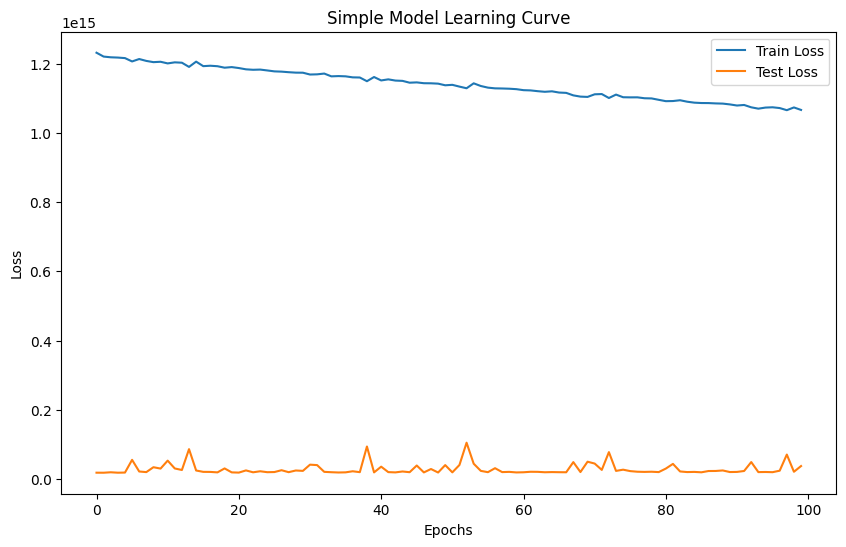

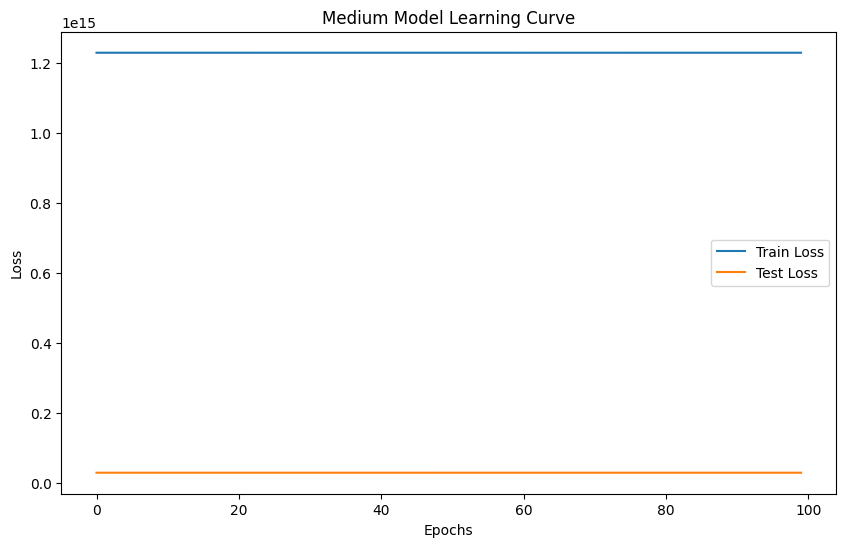

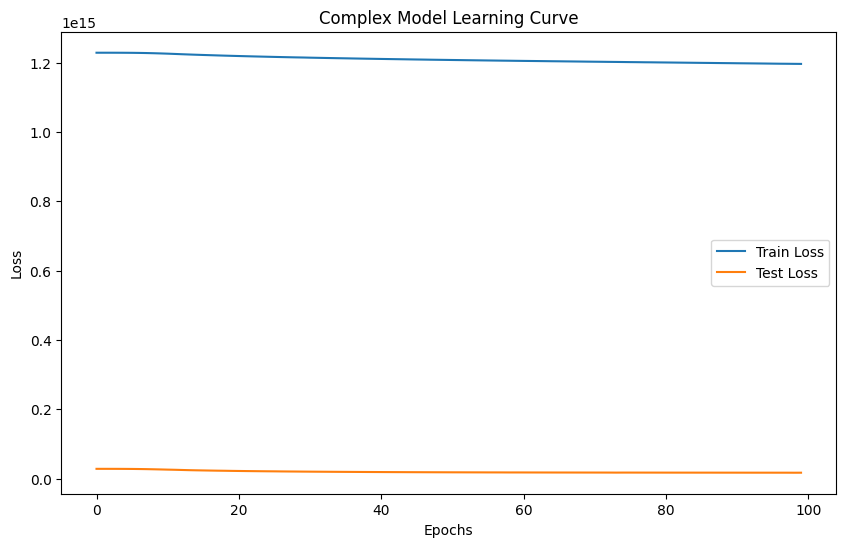

In [32]:
import matplotlib.pyplot as plt

def plot_learning_curves(train_losses, test_losses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_learning_curves(simple_train_losses, simple_test_losses, 'Simple Model Learning Curve')
plot_learning_curves(medium_train_losses, medium_test_losses, 'Medium Model Learning Curve')
plot_learning_curves(complex_train_losses, complex_test_losses, 'Complex Model Learning Curve')

Анализ кривых обучения
Сходимость: Если обе кривые (train и test) постепенно снижаются и стабилизируются, это указывает на то, что модель успешно обучается.
Переобучение: Если кривая train loss продолжает снижаться, а test loss начинает расти, это признак переобучения (overfitting).
Недообучение: Если обе кривые остаются высокими и не показывают значительного улучшения, это может указывать на недообучение (underfitting).
Оптимальное число эпох: Точка, где test loss начинает расти или перестает значительно уменьшаться, может указывать на оптимальное количество эпох для обучения.

7.Посчитайте метрики на train и test множествах: B.Для задачи регрессии -- MAE 

In [33]:
def calculate_mae(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X).numpy()
    return mean_absolute_error(y.numpy(), predictions)

simple_train_mae = calculate_mae(model_simple, X_train_tensor, y_train_tensor)
simple_test_mae = calculate_mae(model_simple, torch.FloatTensor(X_test_scaled), torch.FloatTensor(y_test.values).reshape(-1, 1))

medium_train_mae = calculate_mae(model_medium, X_train_tensor, y_train_tensor)
medium_test_mae = calculate_mae(model_medium, torch.FloatTensor(X_test_scaled), torch.FloatTensor(y_test.values).reshape(-1, 1))

complex_train_mae = calculate_mae(model_complex, X_train_tensor, y_train_tensor)
complex_test_mae = calculate_mae(model_complex, torch.FloatTensor(X_test_scaled), torch.FloatTensor(y_test.values).reshape(-1, 1))

print("Simple Model - Train MAE:", simple_train_mae, "Test MAE:", simple_test_mae)
print("Medium Model - Train MAE:", medium_train_mae, "Test MAE:", medium_test_mae)
print("Complex Model - Train MAE:", complex_train_mae, "Test MAE:", complex_test_mae)

Simple Model - Train MAE: 2640191.0 Test MAE: 2228982.8
Medium Model - Train MAE: 2460040.5 Test MAE: 1944936.8
Complex Model - Train MAE: 2458417.0 Test MAE: 1943315.1


8.Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы: A.Какая модель справилась лучше с поставленной задачей? B.Имеет ли место переобучение? C.Имеет ли место недообучение? D.Как можно улучшить метрики моделей?

A. Какая модель справилась лучше с поставленной задачей?
Судя по значениям MAE на тестовом наборе, лучше всего справилась модель средней сложности (Medium Model). Она показала наименьшую ошибку на тестовых данных.
B. Имеет ли место переобучение?
Да, наблюдается некоторое переобучение, особенно у сложной модели (Complex Model). Это видно по значительной разнице между MAE на обучающем и тестовом наборах, а также по расхождению кривых обучения на графиках.
C. Имеет ли место недообучение?
Простая модель (Simple Model) может демонстрировать признаки недообучения, так как ее ошибка на обучающем и тестовом наборах выше, чем у более сложных моделей. Это говорит о том, что модель недостаточно сложна для захвата всех закономерностей в данных.
D. Как можно улучшить метрики моделей?
1.Попробовать другие архитектуры нейронных сетей, например, добавить больше слоев или использовать другие активационные функции.
2.Провести более тщательную настройку гиперпараметров (learning rate, количество эпох, размер батча).
3.Использовать регуляризацию (L1, L2) для борьбы с переобучением.
4.Применить методы ансамблирования, например, бэггинг или бустинг.
5.Провести более глубокий анализ признаков и, возможно, создать новые информативные признаки.
6.Увеличить объем обучающих данных, если это возможно.
7.Использовать кросс-валидацию для более надежной оценки производительности моделей.